### Using SQLite and Python

In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

### Query database

In [2]:
q = "select * from sqlite_master where type='table'"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


### Write query that returns min(population), max(population), min(population_growth), max(population_growth) from facts table

In [3]:
r = "select min(population), max(population), min(population_growth), max(population_growth) from facts"
pd.read_sql_query(r, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


### Max population and min population looked incorrect so I wrote extra query to verify data

In [4]:
s = "select * from facts"
pd.read_sql_query(s, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,3.256434e+07,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3.029278e+06,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,3.954217e+07,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,8.558000e+04,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,1.962535e+07,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,9.243600e+04,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,4.343189e+07,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743.0,28203.0,1540.0,3.056382e+06,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220.0,7682300.0,58920.0,2.275101e+07,1.07,12.15,7.14,5.65
9,10,au,Austria,83871.0,82445.0,1426.0,8.665550e+06,0.55,9.41,9.42,5.56


### Max population row with over 7 billion is world row, Min population with 0 is Antartica

### Histograms

In [5]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ece7ccef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9ece948470>]], dtype=object)

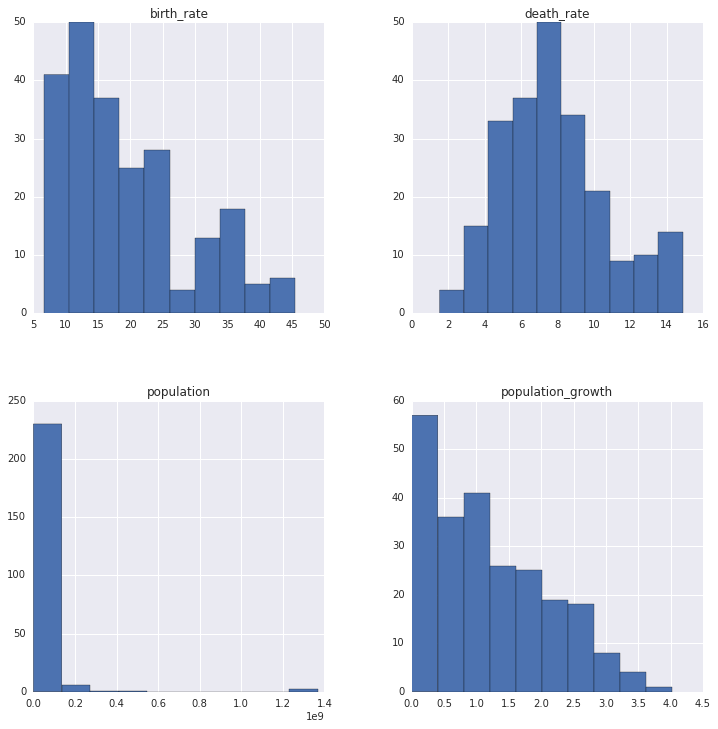

In [26]:
fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111)

t = "select population, population_growth, birth_rate, death_rate \
from facts \
where population != (select min(population) from facts) \
and population != (select max(population) from facts)"
# Setting up the dimension of the figures:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

# Reading and creating the figures based on the different population rates:
pd.read_sql_query(t, conn).hist(ax=ax)

### Which countries have highest population density?

In [30]:
u = "SELECT name as name, CAST(population as float)/CAST(area_land as float) density FROM facts ORDER BY density DESC LIMIT 10;"
density = pd.read_sql_query(u, conn, index_col='name')
print(density)

                 density
name                    
Macau       21168.964286
Monaco      15267.500000
Singapore    8259.784571
Hong Kong    6655.271202
Gaza Strip   5191.819444
Gibraltar    4876.333333
Bahrain      1771.859211
Maldives     1319.640940
Malta        1310.015823
Bermuda      1299.925926


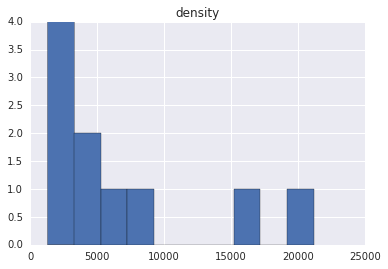

In [25]:
density.hist()
plt.show()

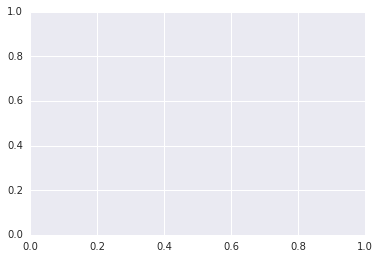

In [33]:
fig, ax = plt.subplots()

In [34]:
ax.hist(name, density)

NameError: name 'name' is not defined